### 1. Series


#### Trong pandas có 2 Object ( đối tượng ) chính : * Data Frame and Series*.
_ 1 DataFrame được tạo từ nhiều Series lại với nhau , mỗi Series được tạo từ list gồm 1 cột (mảng ,list , thuộc tính ) trong DataFrame._

_ Bình thường 1 Series không có tên cột , thường sẽ đặt tên Series đấy chính là tên biến _


In [2]:
import numpy as np
import pandas as pd
s1 = pd.Series(np.random.randint(10,size=5)) #Tạo ra 1 Series
s1

0    4
1    5
2    4
3    2
4    2
dtype: int32

In [3]:
type(s1) #type

pandas.core.series.Series

In [4]:
s1[0] # Lấy index

4

In [5]:
s2 = pd.Series(np.random.randint(10,size=5), index=['a','b','c','d','e'])
s2 # bình thường nếu ta không gán tên cho các index thì chúng sẽ tự lấy bắt đầu từ 0 - > n

a    2
b    0
c    9
d    9
e    2
dtype: int32

In [16]:
s2[0]

2

In [8]:
s2['a'] # Ta cũng có thể gọi các item trong index bằng tên index . Đặt index  0 là a thì máy vẫn hiểu a là index 0

2

In [9]:
s3 = pd.Series({'a':21,'b':31,'c':45,'d':42,'e':12}) # Tạo trực tiếp 1 series gồm các tên index sẵn và item
s3

a    21
b    31
c    45
d    42
e    12
dtype: int64

In [10]:
s3['b']

31

In [11]:
s4 = pd.Series(3, index=[0,1,2,3,4,5]) #Ta cũng có thể sử dụng Series cho việc lặp và muốn lặp bao nhiêu lần . 
                                       ## Chỉ cần xác nhận index , đây ta cho 6 index , lặp 6 lần từ 0- > 5
s4

0    3
1    3
2    3
3    3
4    3
5    3
dtype: int64

In [12]:
s3['b':'c'] #slicing

b    31
c    45
dtype: int64

In [13]:
s5 = pd.Series(np.random.randint(10,size=10), 
               index=['hong', 'hoa', 'hue', 'tham','tuoi','nhat','nheo','tam','chin','muoi'])
s5

hong    9
hoa     7
hue     5
tham    0
tuoi    2
nhat    9
nheo    0
tam     5
chin    2
muoi    2
dtype: int32

###  *Có 1 điều lưu ý . Bình thường index sẽ được đánh từ 0 -> n . Nhưng ở trong DataFrame hay Series thì chúng có thể được đặt tên . Tuy rằng là đặt tên nhưng chúng vẫn sẽ được hiểu đấy là các index 0 -> n :V . ( mẫu mã tên rất đẹp những bên trong chúng vẫn là 0 -> n thôi nhé ) .

* Cho nên khi ta slicing theo index vd: [0:4]  *( [0,n] )* thì chúng sẽ hiểu lấy item 0 -> 3 nhé *( 0 -> (n-1) )* . 
* Nhưng khi slicing bằng names (tên ) thì chúng sẽ lấy tên từ lúc start -> tên end .vd: [không:bốn] lấy item từ không -> bốn 
* Xem code dưới để rõ hơn


In [17]:
s5['tham':'tam'] #slicing index names

tham    0
tuoi    2
nhat    9
nheo    0
tam     5
dtype: int32

In [19]:
s5[3:8] #slicing index . Thấy không tại index 8 có names index là chin , nhưng nó chỉ lấy n-1 . Chính là tám

tham    0
tuoi    2
nhat    9
nheo    0
tam     5
dtype: int32

In [20]:
s5[['hoa','tham','tam']] #indexing 1 list

hoa     7
tham    0
tam     5
dtype: int32

In [21]:
s5.median() # Trung bình

3.5

##### *Ta có thể thực hiện các tính toán Boolean ,hay các phép tính khác ngay trong Series.
* Đỡ được rất nhiều dòng code khi dùng comprehention

In [23]:
s5[s5>4.0] #Lấy item >4.0

hong    9
hoa     7
hue     5
nhat    9
tam     5
dtype: int32

In [24]:
s5[s5%2==0] # Lấy item chia hết cho 2

tham    0
tuoi    2
nheo    0
chin    2
muoi    2
dtype: int32

In [25]:
s5.max() #lớn nhất 

9

* Bình thường các phép tính so sánh chính là về bản chất chính là các Boolean (True ,False) 

In [27]:
t =  s5 > s5.median() # tính toán boolean những item trong s5  có giá trị lớn hơn giá trị trung bình các item có trong s5
t   

hong     True
hoa      True
hue      True
tham    False
tuoi    False
nhat     True
nheo    False
tam      True
chin    False
muoi    False
dtype: bool

In [28]:
s5[s5<s5.median()] # áp dụng boolean và index để lấy các item và index có giá trị nhỏ hơn trung bình của s5

tham    0
tuoi    2
nheo    0
chin    2
muoi    2
dtype: int32

* lưu ý : các giá trị không thể là 1 list hay tuple , chỉ có int or float , vẫn có thể là text nhưng ko tính toán đc
* và đối với boolean *in* là nó đang hỏi *tên index* có tồn tại hay không chứ không nói giá trị . Lưu ý nhé

In [32]:
'hoa' in s5

True

In [34]:
0 in s5 #thấy không , không nói giá trị nhé , tuy rằng 0 có trong 5 

False

In [35]:
s5.head(3) #lấy 3 item đầu

hong    9
hoa     7
hue     5
dtype: int32

In [36]:
s5.tail(4) # lấy phần tử cuối

nheo    0
tam     5
chin    2
muoi    2
dtype: int32

In [37]:
s5.head(-3) # lấy phần tử đầu đến phần tử -3 

hong    9
hoa     7
hue     5
tham    0
tuoi    2
nhat    9
nheo    0
dtype: int32

In [38]:
s5.tail(-3) # Lúc này chúng ta sẽ bị sort ngược lại và lấy từ đầu sort ngược đến -3 nhé .

tham    0
tuoi    2
nhat    9
nheo    0
tam     5
chin    2
muoi    2
dtype: int32

In [39]:
sd = pd.Series({'mon':21,'tue':31,'wed':42,'thu':12,'fri':52,'sat':45,'sun':75})
sd

mon    21
tue    31
wed    42
thu    12
fri    52
sat    45
sun    75
dtype: int64

In [41]:
sd1 = sd[:'fri']
sd1

mon    21
tue    31
wed    42
thu    12
fri    52
dtype: int64

In [42]:
sd2 = sd['wed':]
sd2

wed    42
thu    12
fri    52
sat    45
sun    75
dtype: int64

In [43]:
sd3 = sd1 * sd2 # Khi nhân 2 series với nhau chung sẽ nhân từng chỉ số của từng index tương ứng 
# nếu 1 trong 2 biến không có index tương ứng hay chỉ số ( value) tương ứng chúng sẽ ghép vào và có value NaN
sd3

fri    2704.0
mon       NaN
sat       NaN
sun       NaN
thu     144.0
tue       NaN
wed    1764.0
dtype: float64

In [45]:
# filter: boolean expression , Vẫn ưu tiên trong ngoặc trước nhé
sd[(sd<25) | (sd>50)]

mon    21
thu    12
fri    52
sun    75
dtype: int64

In [46]:
sd[(sd>25) & (sd<50)]

tue    31
wed    42
sat    45
dtype: int64

In [47]:
sd[(sd>65) & (sd>50) | (sd < 25)]

mon    21
thu    12
sun    75
dtype: int64

In [48]:
sd3.median()

1764.0

### Dealing with Missing Data
#### * 1 lưu ý quan trọng giữa nan và non nè 
 Trong pandas cũng như numpy , sẽ không chấp nhận so sánh == với nan , nhưng với none sẽ khác
* link :https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html



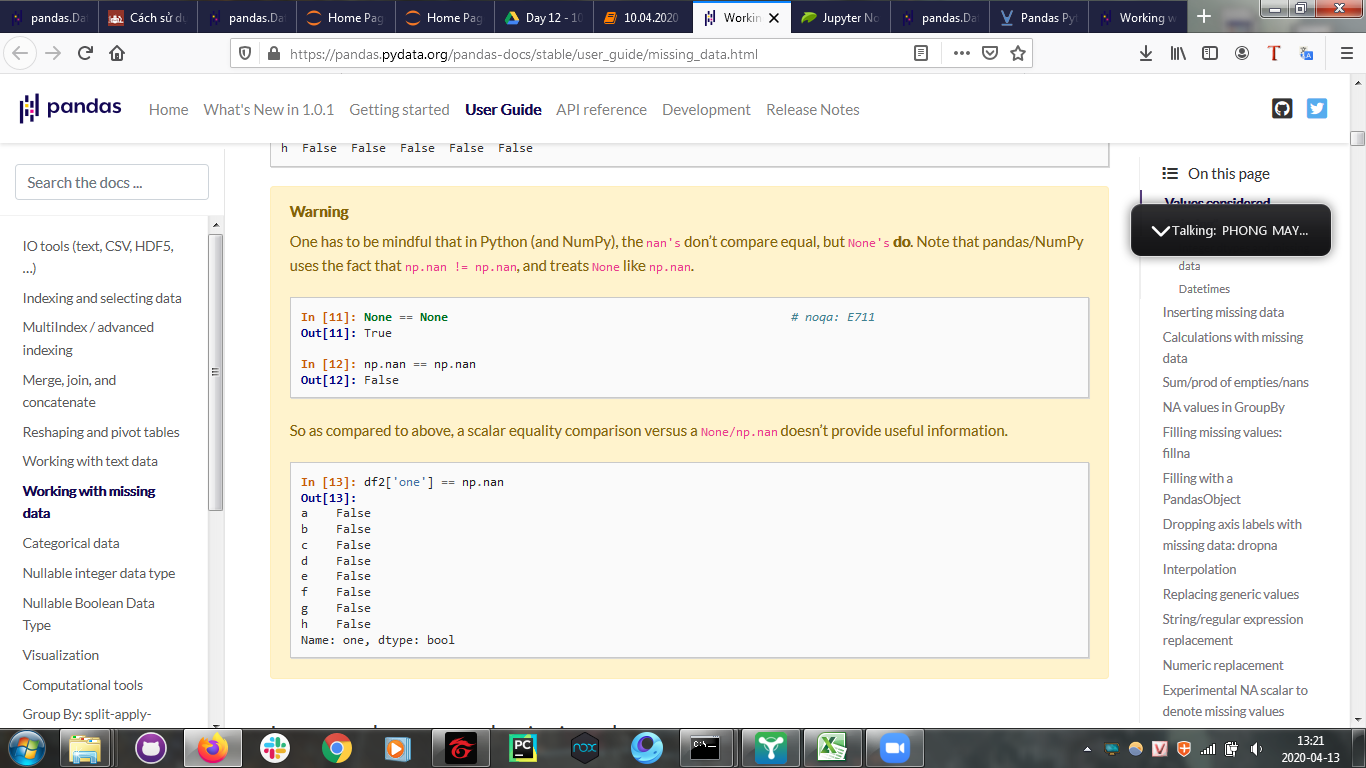

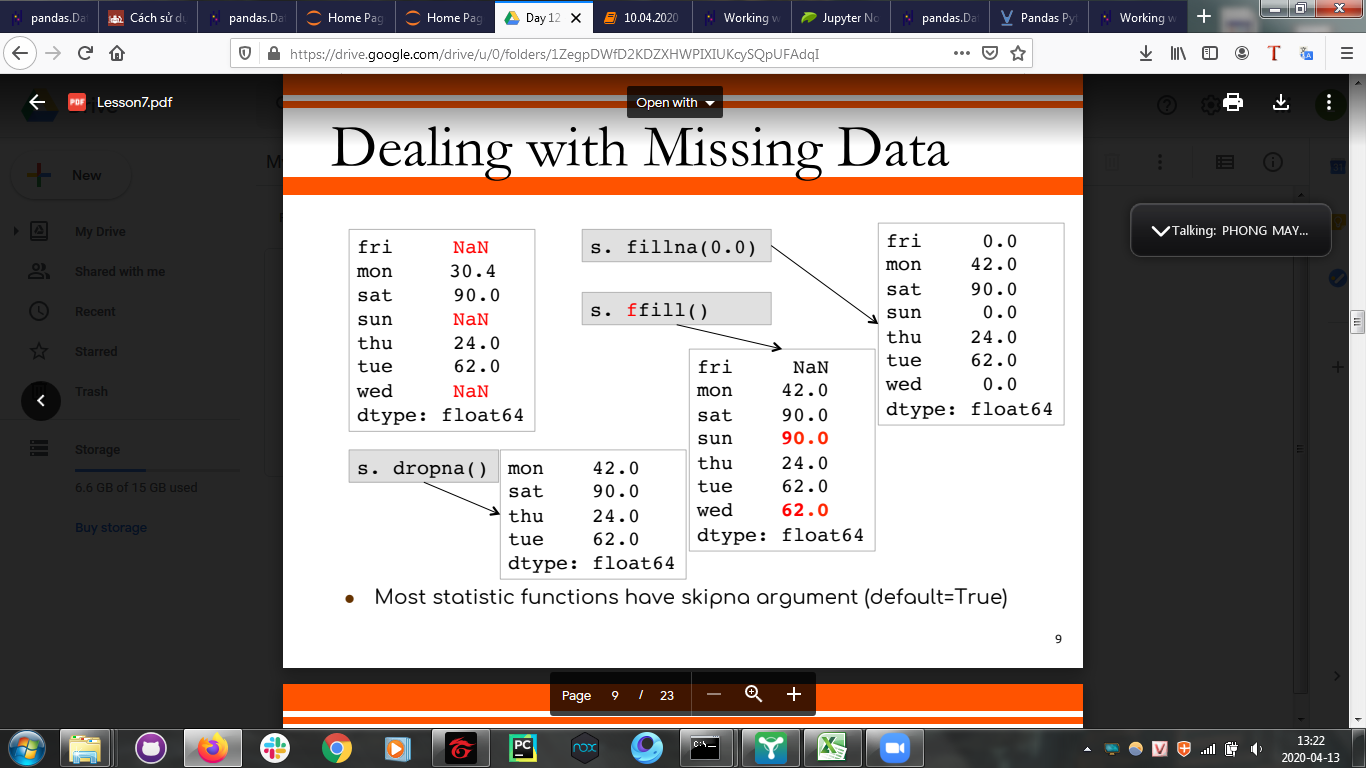

In [57]:
sd3

fri    2704.0
mon       NaN
sat       NaN
sun       NaN
thu     144.0
tue       NaN
wed    1764.0
dtype: float64

In [54]:
sd3.dropna()  #drop missing

fri    2704.0
thu     144.0
wed    1764.0
dtype: float64

In [58]:
sd3.ffill() # lấy giá trị missing là những giá trị trước nó

fri    2704.0
mon    2704.0
sat    2704.0
sun    2704.0
thu     144.0
tue     144.0
wed    1764.0
dtype: float64

In [59]:
sd3.fillna(0.1) # Nếu không đặt value thì nó sẽ tự động gán 0

fri    2704.0
mon       0.1
sat       0.1
sun       0.1
thu     144.0
tue       0.1
wed    1764.0
dtype: float64

với cumsum , giá trị nan sẽ bị bỏ qua , và tiếp tục lấy tổng của tổng :V
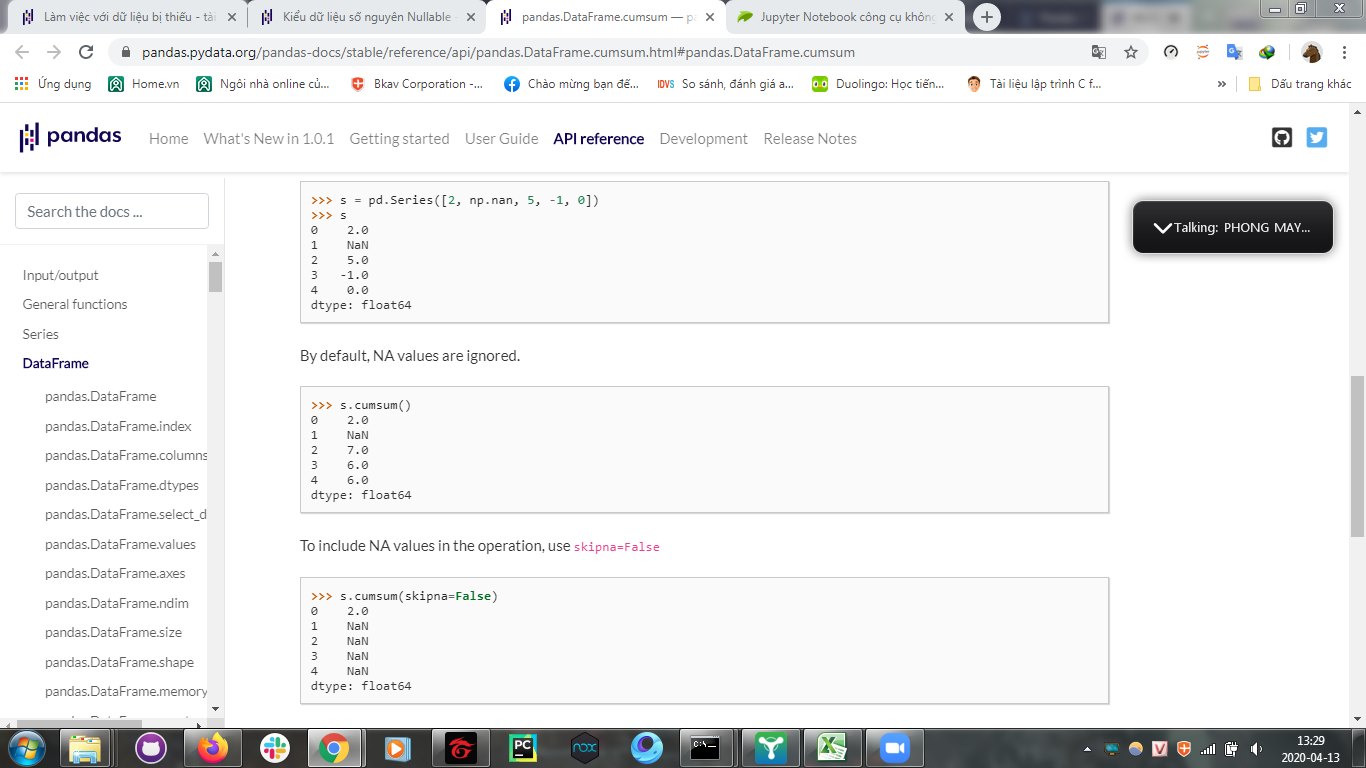

In [55]:
sd.cumsum() 

mon     21
tue     52
wed     94
thu    106
fri    158
sat    203
sun    278
dtype: int64

In [59]:
sd.quantile()

42.0

In [65]:
n = np.random.randint(20,size=15)
n.sort()
n

array([ 0,  2,  2,  4,  5,  9,  9, 10, 11, 12, 15, 16, 17, 18, 18])

In [67]:
s6 = pd.Series(n)
s6

0      0
1      2
2      2
3      4
4      5
5      9
6      9
7     10
8     11
9     12
10    15
11    16
12    17
13    18
14    18
dtype: int64

In [72]:
s6.quantile(.3)

5.800000000000001

In [71]:
s6.describe()

count    15.000000
mean      9.866667
std       6.174448
min       0.000000
25%       4.500000
50%      10.000000
75%      15.500000
max      18.000000
dtype: float64

### 2. DataFrame

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
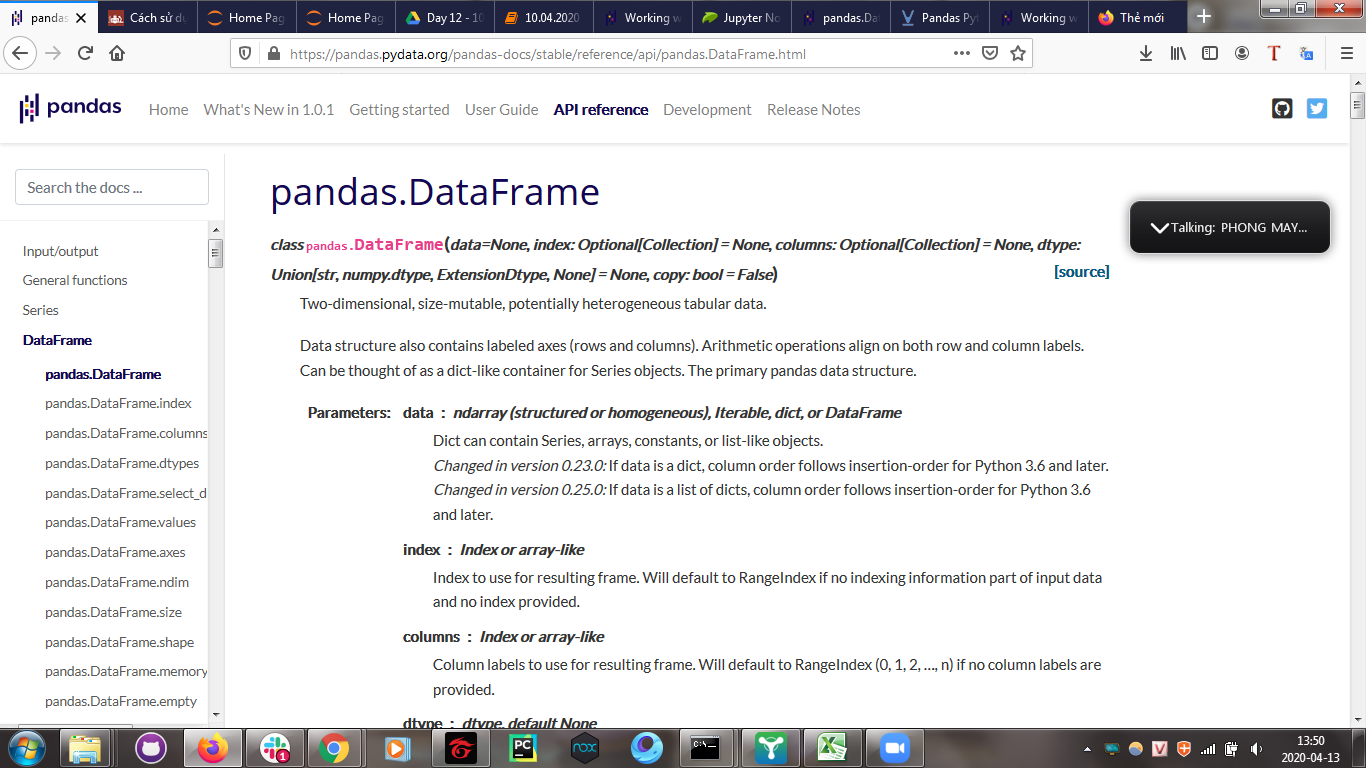

In [61]:
d = {'one':pd.Series([1., 2., 3.], index=['a','b','c']),
    'two':pd.Series([1., 2., 3., 4.], index=['a','b','c','d'])}
df = pd.DataFrame(d)
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [62]:
d1 = {'one' : [1., 2., 3., 4.], #dict of list/darray
    'two' : [4., 3., 2., 1.]}
d2 = [(1, 2.,'Hello'), (2, 3.,'World')] #structure
df1 = pd.DataFrame(d1) # index and columns argument
df2 = pd.DataFrame(d2)
print(df1)
print(df2)

   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0
   0    1      2
0  1  2.0  Hello
1  2  3.0  World


In [63]:
df1['one']

0    1.0
1    2.0
2    3.0
3    4.0
Name: one, dtype: float64

In [64]:
df2[0][1]

2

In [65]:
df3 = pd.DataFrame(d2, columns=['A','B','C'])
df3

A    B      C
0  1  2.0  Hello
1  2  3.0  World

In [66]:
df3['A']

0    1
1    2
Name: A, dtype: int64

In [67]:
d3 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
df4 = pd.DataFrame(d3, index=['r_1st','r_2nd'])
df5 = pd.DataFrame(d3, columns=['a','b'])
print(df4)
print(df5)

       a   b     c
r_1st  1   2   NaN
r_2nd  5  10  20.0
   a   b
0  1   2
1  5  10


In [68]:
df4.shape

(2, 3)

In [69]:
df4.index

Index(['r_1st', 'r_2nd'], dtype='object')

In [70]:
df4.columns

Index(['a', 'b', 'c'], dtype='object')

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [74]:
dfi = pd.read_csv('iris.csv',names =['sepal_length','sepal_width','petal_length' ,'petal_width','label'])
dfi.head()

sepal_length  sepal_width  petal_length  petal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [75]:
dfi['sepal_length'].describe() # lấy các thông số đặc biệt

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [76]:
dfi[['sepal_length','sepal_width']].head(10)

sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6
5           5.4          3.9
6           4.6          3.4
7           5.0          3.4
8           4.4          2.9
9           4.9          3.1

In [80]:
dfi.loc[1] # lấy hàng nhé

sepal_length            4.9
sepal_width               3
petal_length            1.4
petal_width             0.2
label           Iris-setosa
Name: 1, dtype: object

In [81]:
dfi.iloc[1][:'petal_width'].median() # Lấy hàng thứ 2 gồm các frame từ đầu đến 'pental_width' rồi cộng trung bình

2.2

In [82]:
dfi[['sepal_length','sepal_width']][:10]

sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6
5           5.4          3.9
6           4.6          3.4
7           5.0          3.4
8           4.4          2.9
9           4.9          3.1

In [107]:
dfi[(dfi.sepal_length > 5) & (dfi.sepal_width > 4)]

sepal_length  sepal_width  petal_length  petal_width        label
15           5.7          4.4           1.5          0.4  Iris-setosa
32           5.2          4.1           1.5          0.1  Iris-setosa
33           5.5          4.2           1.4          0.2  Iris-setosa

In [109]:
dfi[dfi.label == 'Iris-setosa']

sepal_length  sepal_width  petal_length  petal_width        label
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3          3.0           1.1          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
15           5.7          4.4           1.5          0.4  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
19           5.1          3.8           1.5          0.3  Iris-setosa
20           5.4          3.4           1.7          0.2  Iris-setosa
21           5.1          3.7           1.5          0.4  Iris-setosa
22           4.6          3.6           1.0          0.2  Iris-setosa
23           5.1          3.3           1.7          0.5  Iris-setosa
24           4.8          3.4           1.9          0.2  Iris-setosa
25           5.0          3.0           1.6          0.2  Iris-setosa
26           5.0          3.4           1.6          0.4  Iris-setosa
27           5.2          3.5           1.5          0.2  Iris-setosa
28           5.2          3.4           1.4          0.2  Iris-setosa
29           4.7          3.2           1.6          0.2  Iris-setosa
30           4.8          3.1           1.6          0.2  Iris-setosa
31           5.4          3.4           1.5          0.4  Iris-setosa
32           5.2          4.1           1.5          0.1  Iris-setosa
33           5.5          4.2           1.4          0.2  Iris-setosa
34           4.9          3.1           1.5          0.1  Iris-setosa
35           5.0          3.2           1.2          0.2  Iris-setosa
36           5.5          3.5           1.3          0.2  Iris-setosa
37           4.9          3.1           1.5          0.1  Iris-setosa
38           4.4          3.0           1.3          0.2  Iris-setosa
39           5.1          3.4           1.5          0.2  Iris-setosa
40           5.0          3.5           1.3          0.3  Iris-setosa
41           4.5          2.3           1.3          0.3  Iris-setosa
42           4.4          3.2           1.3          0.2  Iris-setosa
43           5.0          3.5           1.6          0.6  Iris-setosa
44           5.1          3.8           1.9          0.4  Iris-setosa
45           4.8          3.0           1.4          0.3  Iris-setosa
46           5.1          3.8           1.6          0.2  Iris-setosa
47           4.6          3.2           1.4          0.2  Iris-setosa
48           5.3          3.7           1.5          0.2  Iris-setosa
49           5.0          3.3           1.4          0.2  Iris-setosa

In [110]:
sn = dfi.sepal_length + dfi.sepal_width
sn

0       8.6
1       7.9
2       7.9
3       7.7
4       8.6
5       9.3
6       8.0
7       8.4
8       7.3
9       8.0
10      9.1
11      8.2
12      7.8
13      7.3
14      9.8
15     10.1
16      9.3
17      8.6
18      9.5
19      8.9
20      8.8
21      8.8
22      8.2
23      8.4
24      8.2
25      8.0
26      8.4
27      8.7
28      8.6
29      7.9
       ... 
120    10.1
121     8.4
122    10.5
123     9.0
124    10.0
125    10.4
126     9.0
127     9.1
128     9.2
129    10.2
130    10.2
131    11.7
132     9.2
133     9.1
134     8.7
135    10.7
136     9.7
137     9.5
138     9.0
139    10.0
140     9.8
141    10.0
142     8.5
143    10.0
144    10.0
145     9.7
146     8.8
147     9.5
148     9.6
149     8.9
Length: 150, dtype: float64

In [111]:
dfi[2:5] + dfi[3:6]

sepal_length  sepal_width  petal_length  petal_width  \
2           NaN          NaN           NaN          NaN   
3           9.2          6.2           3.0          0.4   
4          10.0          7.2           2.8          0.4   
5           NaN          NaN           NaN          NaN   

                    label  
2                     NaN  
3  Iris-setosaIris-setosa  
4  Iris-setosaIris-setosa  
5                     NaN

In [86]:
dfi['newc'] = dfi.sepal_length + dfi.sepal_width # tạo 1 cột mới , 
dfi.head(10)

sepal_length  sepal_width  petal_length  petal_width        label  newc
0           5.1          3.5           1.4          0.2  Iris-setosa   8.6
1           4.9          3.0           1.4          0.2  Iris-setosa   7.9
2           4.7          3.2           1.3          0.2  Iris-setosa   7.9
3           4.6          3.1           1.5          0.2  Iris-setosa   7.7
4           5.0          3.6           1.4          0.2  Iris-setosa   8.6
5           5.4          3.9           1.7          0.4  Iris-setosa   9.3
6           4.6          3.4           1.4          0.3  Iris-setosa   8.0
7           5.0          3.4           1.5          0.2  Iris-setosa   8.4
8           4.4          2.9           1.4          0.2  Iris-setosa   7.3
9           4.9          3.1           1.5          0.1  Iris-setosa   8.0

In [87]:
dfi['newc1'] = dfi.sepal_length + dfi.sepal_width

In [88]:
dfi.head()

sepal_length  sepal_width  petal_length  petal_width        label  newc  \
0           5.1          3.5           1.4          0.2  Iris-setosa   8.6   
1           4.9          3.0           1.4          0.2  Iris-setosa   7.9   
2           4.7          3.2           1.3          0.2  Iris-setosa   7.9   
3           4.6          3.1           1.5          0.2  Iris-setosa   7.7   
4           5.0          3.6           1.4          0.2  Iris-setosa   8.6   

   newc1  
0    8.6  
1    7.9  
2    7.9  
3    7.7  
4    8.6

In [89]:
dfi.pop('newc')
dfi.head()

sepal_length  sepal_width  petal_length  petal_width        label  newc1
0           5.1          3.5           1.4          0.2  Iris-setosa    8.6
1           4.9          3.0           1.4          0.2  Iris-setosa    7.9
2           4.7          3.2           1.3          0.2  Iris-setosa    7.9
3           4.6          3.1           1.5          0.2  Iris-setosa    7.7
4           5.0          3.6           1.4          0.2  Iris-setosa    8.6

In [90]:
dfin = dfi.drop(columns=['newc1']) # Trả về 1 dataframe với columns bị xóa
dfin.head()

sepal_length  sepal_width  petal_length  petal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [91]:
del(dfi['newc1']) # Del là xóa
dfi.head()

sepal_length  sepal_width  petal_length  petal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

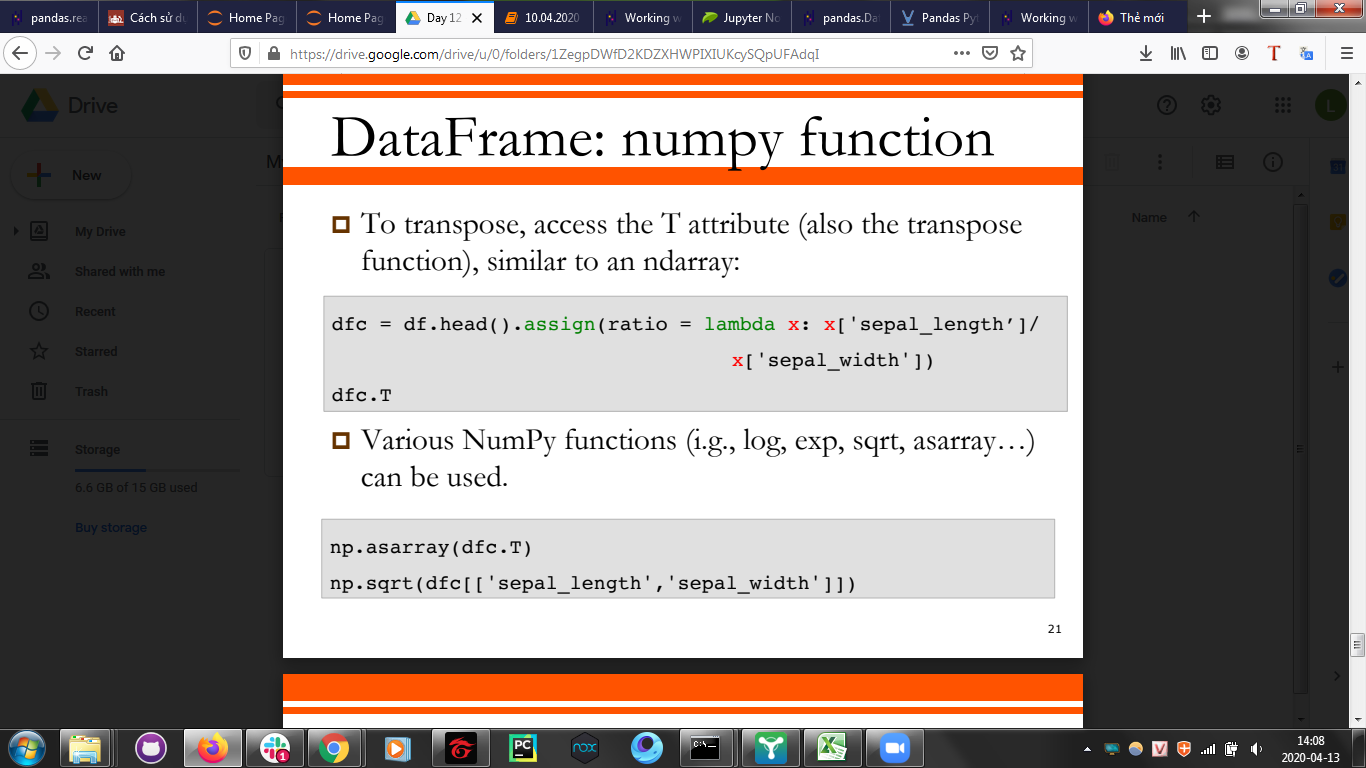

In [97]:
dfi.head().assign(ratio = dfi['sepal_length']/dfi['sepal_width']) # thường được dùng để khảo sát , tham khảo

sepal_length  sepal_width  petal_length  petal_width        label     ratio
0           5.1          3.5           1.4          0.2  Iris-setosa  1.457143
1           4.9          3.0           1.4          0.2  Iris-setosa  1.633333
2           4.7          3.2           1.3          0.2  Iris-setosa  1.468750
3           4.6          3.1           1.5          0.2  Iris-setosa  1.483871
4           5.0          3.6           1.4          0.2  Iris-setosa  1.388889

In [95]:
dfi # lưu ý nhé nếu bạn không gán lại vào biến thì nó sẽ chỉ lấy bộ nhớ là local thôi , xem thì rõ

sepal_length  sepal_width  petal_length  petal_width           label
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [96]:
df = dfi.head() # gán mới
df['ratio'] = df['sepal_length']/df['sepal_width'] # thêm mới 
df

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


sepal_length  sepal_width  petal_length  petal_width        label     ratio
0           5.1          3.5           1.4          0.2  Iris-setosa  1.457143
1           4.9          3.0           1.4          0.2  Iris-setosa  1.633333
2           4.7          3.2           1.3          0.2  Iris-setosa  1.468750
3           4.6          3.1           1.5          0.2  Iris-setosa  1.483871
4           5.0          3.6           1.4          0.2  Iris-setosa  1.388889

In [127]:
dfi.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000